,date,category,value1,value2,id
0,2024-01-01,A,47.69,27.10,1
1,2024-01-02,C,47.62,21.08,2
2,2024-01-03,B,57.58,44.34,3
3,2024-01-04,B,43.98,17.80,4
4,2024-01-05,A,63.71,35.59,5
5,2024-01-06,A,59.02,36.20,6
6,2024-01-07,A,59.49,44.34,7
7,2024-01-08,C,33.09,11.24,8
8,2024-01-09,B,74.83,51.88,9
9,2024-01-10,B,41.18,24.77,10


value1              value2             
           mean    std count   mean    std count
category                                        
A         49.09  11.36    69  29.57   8.60    69
B         60.41  14.16    43  37.80  10.21    43
C         45.15  12.02    38  26.54   9.12    38

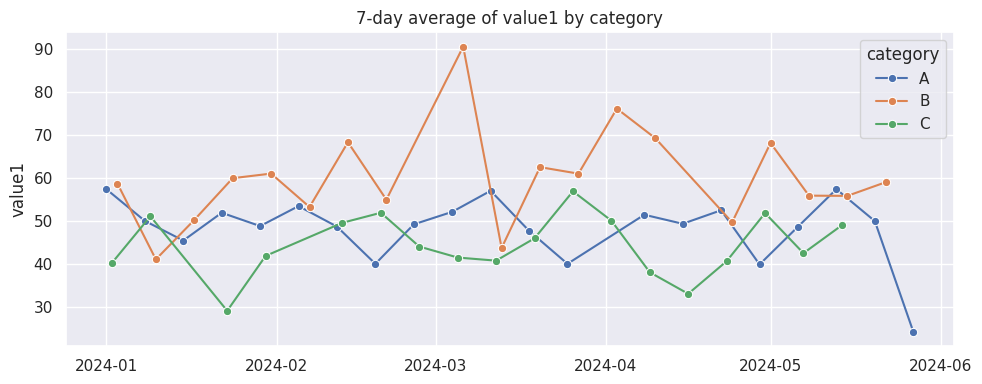

/tmp/ipykernel_444740/3032026624.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="category", y="value1", order=order, ci=None)


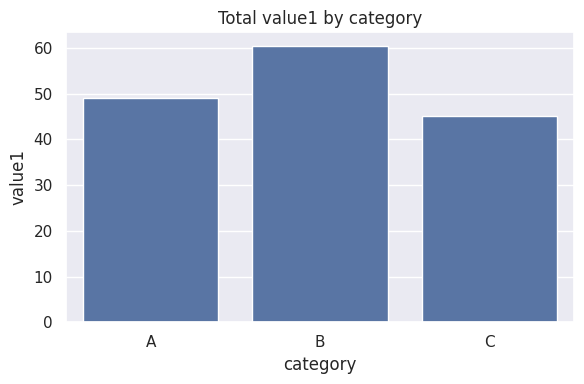

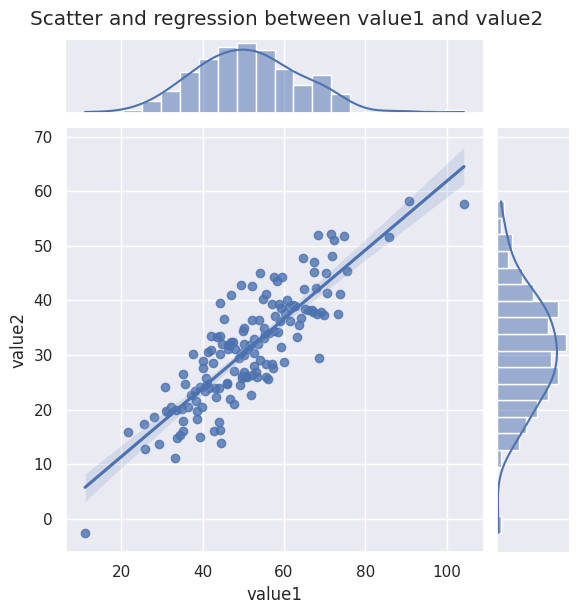

In [ ]:
# New notebook cell (index 0): quick demo showing tables and graphs in VSCode Jupyter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_theme(style="darkgrid")
# %%  # split: end of first cell (imports); start a new code cell here
np.random.seed(42)
# %%  # start another new cell for the dataset creation and plotting that follows

# Create sample dataset
n = 150
dates = pd.date_range("2024-01-01", periods=n, freq="D")
categories = np.random.choice(list("ABC"), size=n, p=[0.4, 0.35, 0.25])
value1 = np.random.normal(loc=50, scale=12, size=n) + (categories == "B") * 8 + (categories == "C") * -6
value2 = value1 * 0.6 + np.random.normal(scale=6, size=n)
df = pd.DataFrame({
    "date": dates,
    "category": categories,
    "value1": value1.round(2),
    "value2": value2.round(2),
    "id": np.arange(1, n + 1)
})

# Show table (styled) and a simple summary
display(df.head(12))
display(df.groupby("category")[["value1", "value2"]].agg(["mean", "std", "count"]).round(2))

# Time series: daily rolling mean by category
df_ts = df.set_index("date").groupby("category")[["value1"]].resample("7D").mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_ts, x="date", y="value1", hue="category", marker="o")
plt.title("7-day average of value1 by category")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Bar chart: total value1 by category
plt.figure(figsize=(6, 4))
order = df.groupby("category")["value1"].sum().sort_values(ascending=False).index
sns.barplot(data=df, x="category", y="value1", order=order, ci=None)
plt.title("Total value1 by category")
plt.tight_layout()
plt.show()

# Scatter with regression and marginal histograms (seaborn jointplot)
sns.jointplot(data=df, x="value1", y="value2", kind="reg", height=6, marginal_kws=dict(bins=20, fill=True))
plt.suptitle("Scatter and regression between value1 and value2", y=1.02)
plt.show()